# IPL Cricket Data Analysis (2008-2020)
**Dataset:** IPL Ball-by-Ball and Match Data  

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from collections import Counter

plt.style.use('default')
sns.set_palette("husl")
init_notebook_mode(connected=True)


In [2]:
deliveries_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv('IPL Matches 2008-2020.csv')

print(f"Ball-by-ball records: {deliveries_data.shape[0]:,}")
print(f"Total matches: {match_data.shape[0]:,}")
print(f"Date range: {match_data['date'].min()} to {match_data['date'].max()}")


Ball-by-ball records: 193,468
Total matches: 816
Date range: 2008-04-18 to 2020-11-10


In [3]:
match_data.head()


id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

In [4]:
deliveries_data.head()


id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

## 1. Basic IPL Statistics


In [5]:
total_matches = match_data.shape[0]
unique_venues = match_data['city'].nunique()
all_teams = set(match_data['team1'].unique()) | set(match_data['team2'].unique())

print(f"Total Matches: {total_matches:,}")
print(f"Unique Venues: {unique_venues}")
print(f"Teams Participated: {len(all_teams)}")
print(f"Most Toss Winner: {match_data['toss_winner'].value_counts().index[0]}")
print(f"Most Player of Match: {match_data['player_of_match'].value_counts().index[0]}")


Total Matches: 816
Unique Venues: 32
Teams Participated: 15
Most Toss Winner: Mumbai Indians
Most Player of Match: AB de Villiers


## 2. Virat Kohli Performance Analysis


In [6]:
kohli_data = deliveries_data[deliveries_data['batsman'] == 'V Kohli']
print(f"Kohli's total balls faced: {len(kohli_data):,}")

runs_1 = len(kohli_data[kohli_data['batsman_runs'] == 1])
runs_2 = len(kohli_data[kohli_data['batsman_runs'] == 2]) * 2
runs_3 = len(kohli_data[kohli_data['batsman_runs'] == 3]) * 3
runs_4 = len(kohli_data[kohli_data['batsman_runs'] == 4]) * 4
runs_6 = len(kohli_data[kohli_data['batsman_runs'] == 6]) * 6

print(f"Singles: {runs_1:,} runs")
print(f"Doubles: {runs_2:,} runs")
print(f"Triples: {runs_3:,} runs")
print(f"Fours: {runs_4:,} runs")
print(f"Sixes: {runs_6:,} runs")


Kohli's total balls faced: 4,609
Singles: 1,919 runs
Doubles: 692 runs
Triples: 39 runs
Fours: 2,016 runs
Sixes: 1,212 runs


In [7]:
values = [runs_1, runs_2, runs_3, runs_4, runs_6]
labels = ['Singles', 'Doubles', 'Triples', 'Fours', 'Sixes']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(title="Virat Kohli's Run Distribution")
fig.show()


## 3. Toss Decision Trends


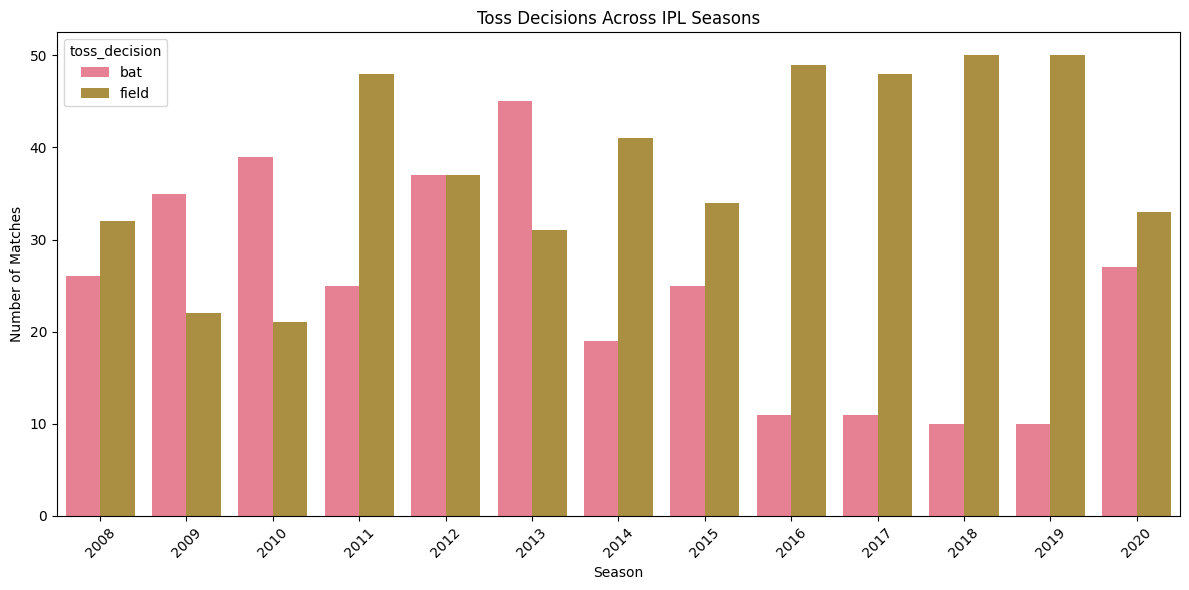

In [8]:
match_data['Season'] = pd.to_datetime(match_data['date']).dt.year
toss_analysis = match_data.groupby(['Season', 'toss_decision']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=toss_analysis, x='Season', y='count', hue='toss_decision')
plt.title('Toss Decisions Across IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Toss Winner vs Match Winner


In [9]:
match_data['toss_win_game_win'] = np.where(
    match_data['toss_winner'] == match_data['winner'], 'Yes', 'No'
)

toss_win_counts = match_data['toss_win_game_win'].value_counts()
print(f"Toss winner won match: {toss_win_counts.get('Yes', 0)} times")
print(f"Toss winner lost match: {toss_win_counts.get('No', 0)} times")


Toss winner won match: 418 times
Toss winner lost match: 398 times


In [10]:
labels = toss_win_counts.index
values = toss_win_counts.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(title="Toss Winner vs Match Winner")
fig.show()


## 5. IPL Tournament Winners


In [11]:
winners_by_season = {}
for year in sorted(match_data['Season'].unique()):
    season_data = match_data[match_data['Season'] == year]
    winner = season_data['winner'].iloc[-1]
    winners_by_season[year] = winner

print("Tournament Winners by Season:")
for year, winner in winners_by_season.items():
    print(f"{year}: {winner}")

winner_counts = Counter(winners_by_season.values())
print(f"\nTotal Tournament Wins:")
for team, wins in winner_counts.most_common():
    print(f"{team}: {wins} wins")


Tournament Winners by Season:
2008: Rajasthan Royals
2009: Deccan Chargers
2010: Chennai Super Kings
2011: Chennai Super Kings
2012: Kolkata Knight Riders
2013: Mumbai Indians
2014: Kolkata Knight Riders
2015: Mumbai Indians
2016: Sunrisers Hyderabad
2017: Mumbai Indians
2018: Chennai Super Kings
2019: Mumbai Indians
2020: Mumbai Indians

Total Tournament Wins:
Mumbai Indians: 5 wins
Chennai Super Kings: 3 wins
Kolkata Knight Riders: 2 wins
Rajasthan Royals: 1 wins
Deccan Chargers: 1 wins
Sunrisers Hyderabad: 1 wins


## 6. Team Performance Analysis


In [12]:
matches_played = match_data['team1'].value_counts() + match_data['team2'].value_counts()
matches_played_df = matches_played.to_frame().reset_index()
matches_played_df.columns = ['team_name', 'Matches_played']

wins_df = match_data['winner'].value_counts().reset_index()
wins_df.columns = ['team_name', 'Wins']

performance_df = matches_played_df.merge(wins_df, on='team_name', how='inner')
performance_df['Win_Percentage'] = (performance_df['Wins'] / performance_df['Matches_played'] * 100).round(2)

performance_df.sort_values('Win_Percentage', ascending=False)


team_name  Matches_played  Wins  Win_Percentage
11       Rising Pune Supergiant              16    10           62.50
0           Chennai Super Kings             178   106           59.55
8                Mumbai Indians             203   120           59.11
2                Delhi Capitals              33    19           57.58
14          Sunrisers Hyderabad             124    66           53.23
7         Kolkata Knight Riders             192    99           51.56
10             Rajasthan Royals             161    81           50.31
13  Royal Challengers Bangalore             195    91           46.67
5               Kings XI Punjab             190    88           46.32
4                 Gujarat Lions              30    13           43.33
6          Kochi Tuskers Kerala              14     6           42.86
3              Delhi Daredevils             161    67           41.61
1               Deccan Chargers              75    29           38.67
12      Rising Pune Supergiants              14     5           35.71
9                 Pune Warriors              46    12           26.09

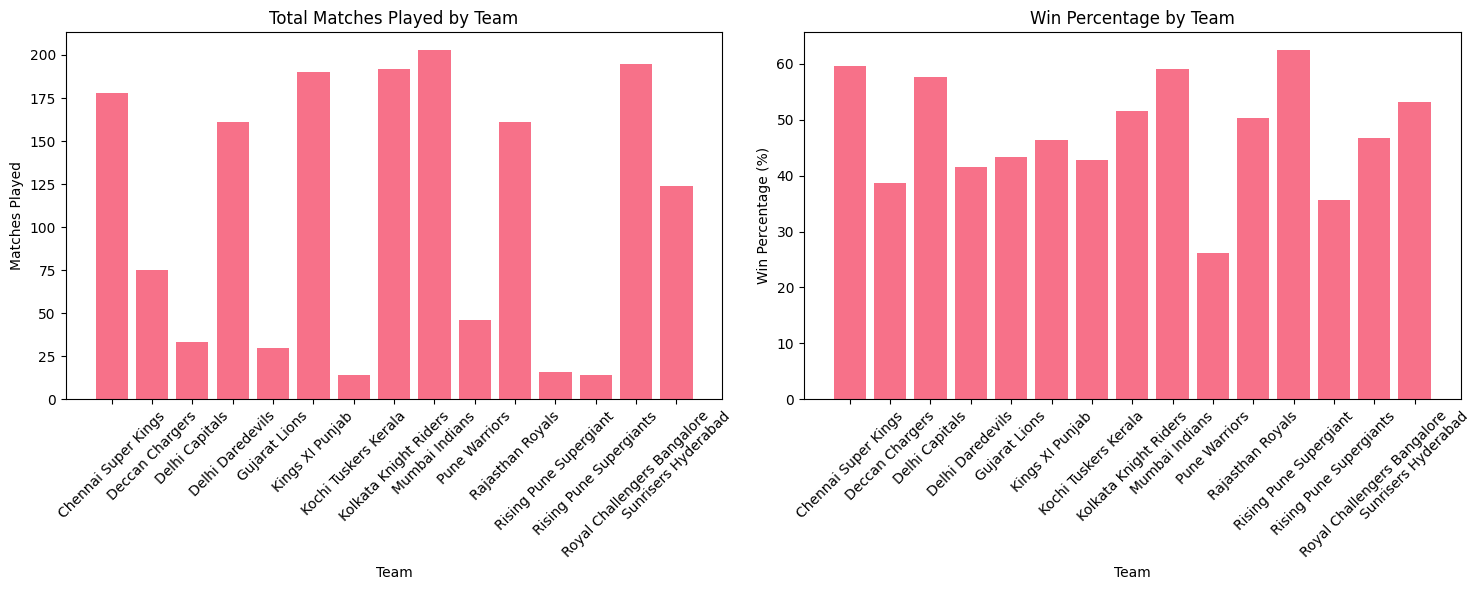

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(performance_df['team_name'], performance_df['Matches_played'])
ax[0].set_title('Total Matches Played by Team')
ax[0].set_xlabel('Team')
ax[0].set_ylabel('Matches Played')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(performance_df['team_name'], performance_df['Win_Percentage'])
ax[1].set_title('Win Percentage by Team')
ax[1].set_xlabel('Team')
ax[1].set_ylabel('Win Percentage (%)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. Top Batsmen Analysis


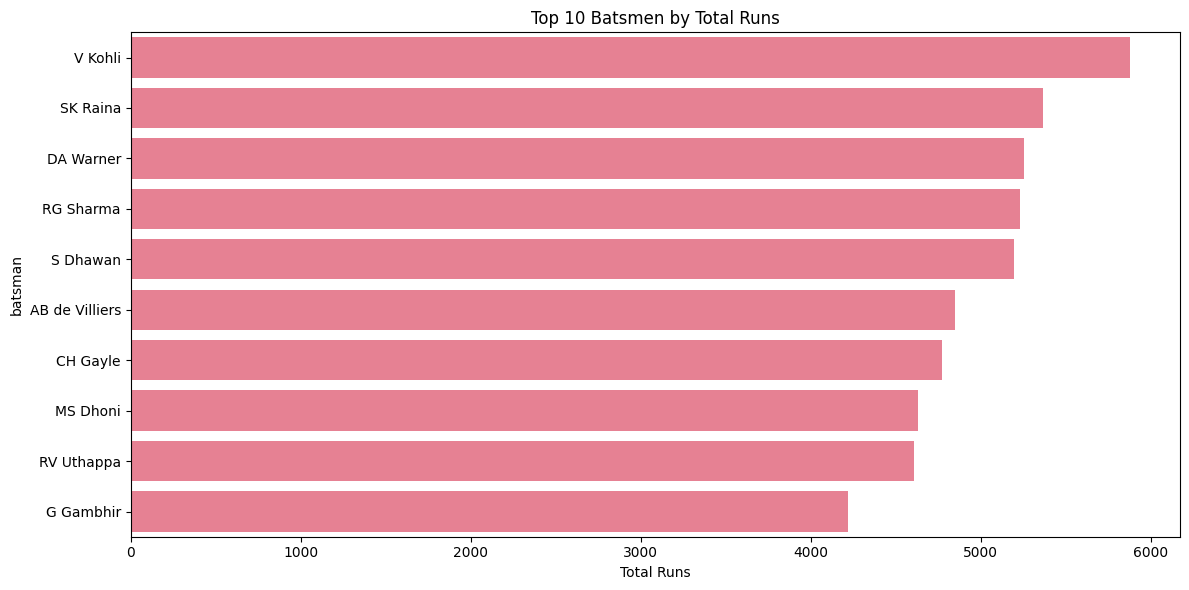

Top 10 Batsmen:
1. V Kohli: 5,878 runs
2. SK Raina: 5,368 runs
3. DA Warner: 5,254 runs
4. RG Sharma: 5,230 runs
5. S Dhawan: 5,197 runs
6. AB de Villiers: 4,849 runs
7. CH Gayle: 4,772 runs
8. MS Dhoni: 4,632 runs
9. RV Uthappa: 4,607 runs
10. G Gambhir: 4,217 runs


In [14]:
batsman_runs = deliveries_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_batsmen = batsman_runs.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.tight_layout()
plt.show()

print("Top 10 Batsmen:")
for i, (batsman, runs) in enumerate(top_batsmen.items(), 1):
    print(f"{i}. {batsman}: {runs:,} runs")


## 8. Venue Analysis


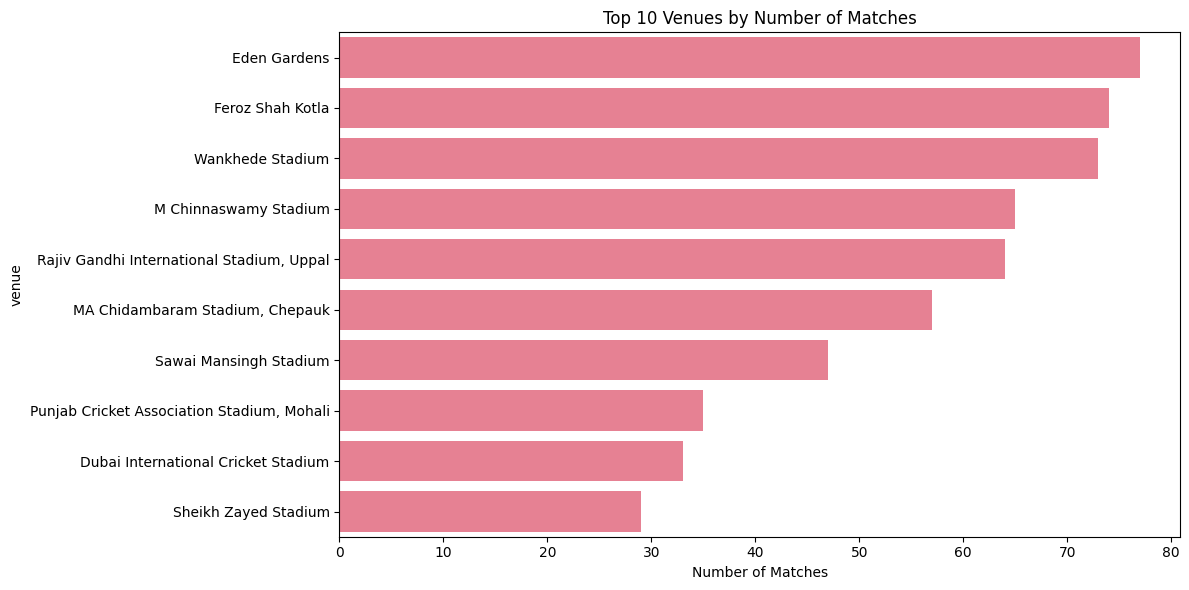

Top 10 Venues:
1. Eden Gardens: 77 matches
2. Feroz Shah Kotla: 74 matches
3. Wankhede Stadium: 73 matches
4. M Chinnaswamy Stadium: 65 matches
5. Rajiv Gandhi International Stadium, Uppal: 64 matches
6. MA Chidambaram Stadium, Chepauk: 57 matches
7. Sawai Mansingh Stadium: 47 matches
8. Punjab Cricket Association Stadium, Mohali: 35 matches
9. Dubai International Cricket Stadium: 33 matches
10. Sheikh Zayed Stadium: 29 matches


In [15]:
venue_matches = match_data['venue'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=venue_matches.values, y=venue_matches.index)
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.tight_layout()
plt.show()

print("Top 10 Venues:")
for i, (venue, matches) in enumerate(venue_matches.items(), 1):
    print(f"{i}. {venue}: {matches} matches")


## Key Insights Summary


In [16]:
print("KEY INSIGHTS FROM IPL DATA ANALYSIS")
print("=" * 50)
print(f"• Analyzed {match_data.shape[0]:,} matches across 13 IPL seasons")
print(f"• Processed {deliveries_data.shape[0]:,} ball-by-ball records")
print(f"• Teams increasingly prefer fielding first since 2014")
print(f"• Toss advantage doesn't guarantee match victory")
print(f"• {winner_counts.most_common(1)[0][0]} has won the most tournaments")
print(f"• {top_batsmen.index[0]} is the leading run-scorer with {top_batsmen.iloc[0]:,} runs")
print(f"• Virat Kohli scores more runs through singles than sixes")
print(f"• {venue_matches.index[0]} has hosted the most matches ({venue_matches.iloc[0]} matches)")


KEY INSIGHTS FROM IPL DATA ANALYSIS
• Analyzed 816 matches across 13 IPL seasons
• Processed 193,468 ball-by-ball records
• Teams increasingly prefer fielding first since 2014
• Toss advantage doesn't guarantee match victory
• Mumbai Indians has won the most tournaments
• V Kohli is the leading run-scorer with 5,878 runs
• Virat Kohli scores more runs through singles than sixes
• Eden Gardens has hosted the most matches (77 matches)
